# 파이썬으로 엑셀을 만져보자
## openpyxl

- openpyxl을 가져오는 방법 / import 
- 설치는 pip install openpyxl

In [1]:
from openpyxl import Workbook

# 엑셀 파일 생성하기
엑셀 파일을 생성하고 저장하기 
- 파일하나의 단위를 workbook이라고 함 -> wb
- wb 변수에 새로운 워크북을 생성 
- 활성화된 시트를 가져오고 이름을 Ewards라고 줍시다.
- 그리고 edwards.xlsx에 저장

In [3]:
wb = Workbook() 
ws = wb.active # 현재 활성화된 sheet 가져옴
ws.title = "Edwards" # sheet 의 이름을 변경
wb.save("edwards.xlsx")

# Sheet 다루기
여러 시트를 생성하고 시트의 이름및 색상등을 변경하기
- create_sheet()
- sheet_properties.tabColor
- title
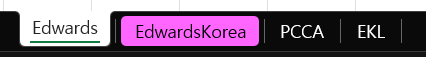

In [4]:
wb.active
ws = wb.create_sheet() # 새로운 Sheet 기본 이름으로 생성
ws.title = "EdwardsKorea" # Sheet 이름 변경
ws.sheet_properties.tabColor = "ff66ff" # RGB 형태로 값을 넣어주면 탭 색상 변경

# Sheet, MySheet, YourSheet
ws1 = wb.create_sheet("EKL") # 주어진 이름으로 Sheet 생성
ws1.sheet_properties.tabColor = "0000ff"
ws2 = wb.create_sheet("PCCA", 2) # 2번째 index 에 Sheet 생성
wb.save("edwards.xlsx")

# Cell 다루기
### 셀에 값을 채워 넣기
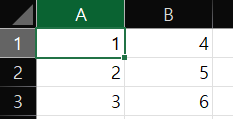

In [5]:
ws = wb.active
ws.title = "EdwardsSheet"

# A1 셀에 1 이라는 값을 입력
ws["A1"] = 1
ws["A2"] = 2
ws["A3"] = 3

ws["B1"] = 4
ws["B2"] = 5
ws["B3"] = 6

ws["C1"] = 7
ws["C2"] = 8
ws["C3"] = 9
wb.save("edwards.xlsx")

### Sheet 복사하기

In [6]:
target = wb.copy_worksheet(ws)
target.title = "EdwardsSheet Copied Sheet"
wb.save("edwards.xlsx")

### 셀의 값을 확인하는 방법
1. Cell Valve보기 A1,B1,C2

In [8]:
print(ws["A2"].value)
print(ws["B2"].value)
print(ws["C2"].value)
print(ws["B3"].value)

2
5
8
6


2. column과 row로 확인 하기
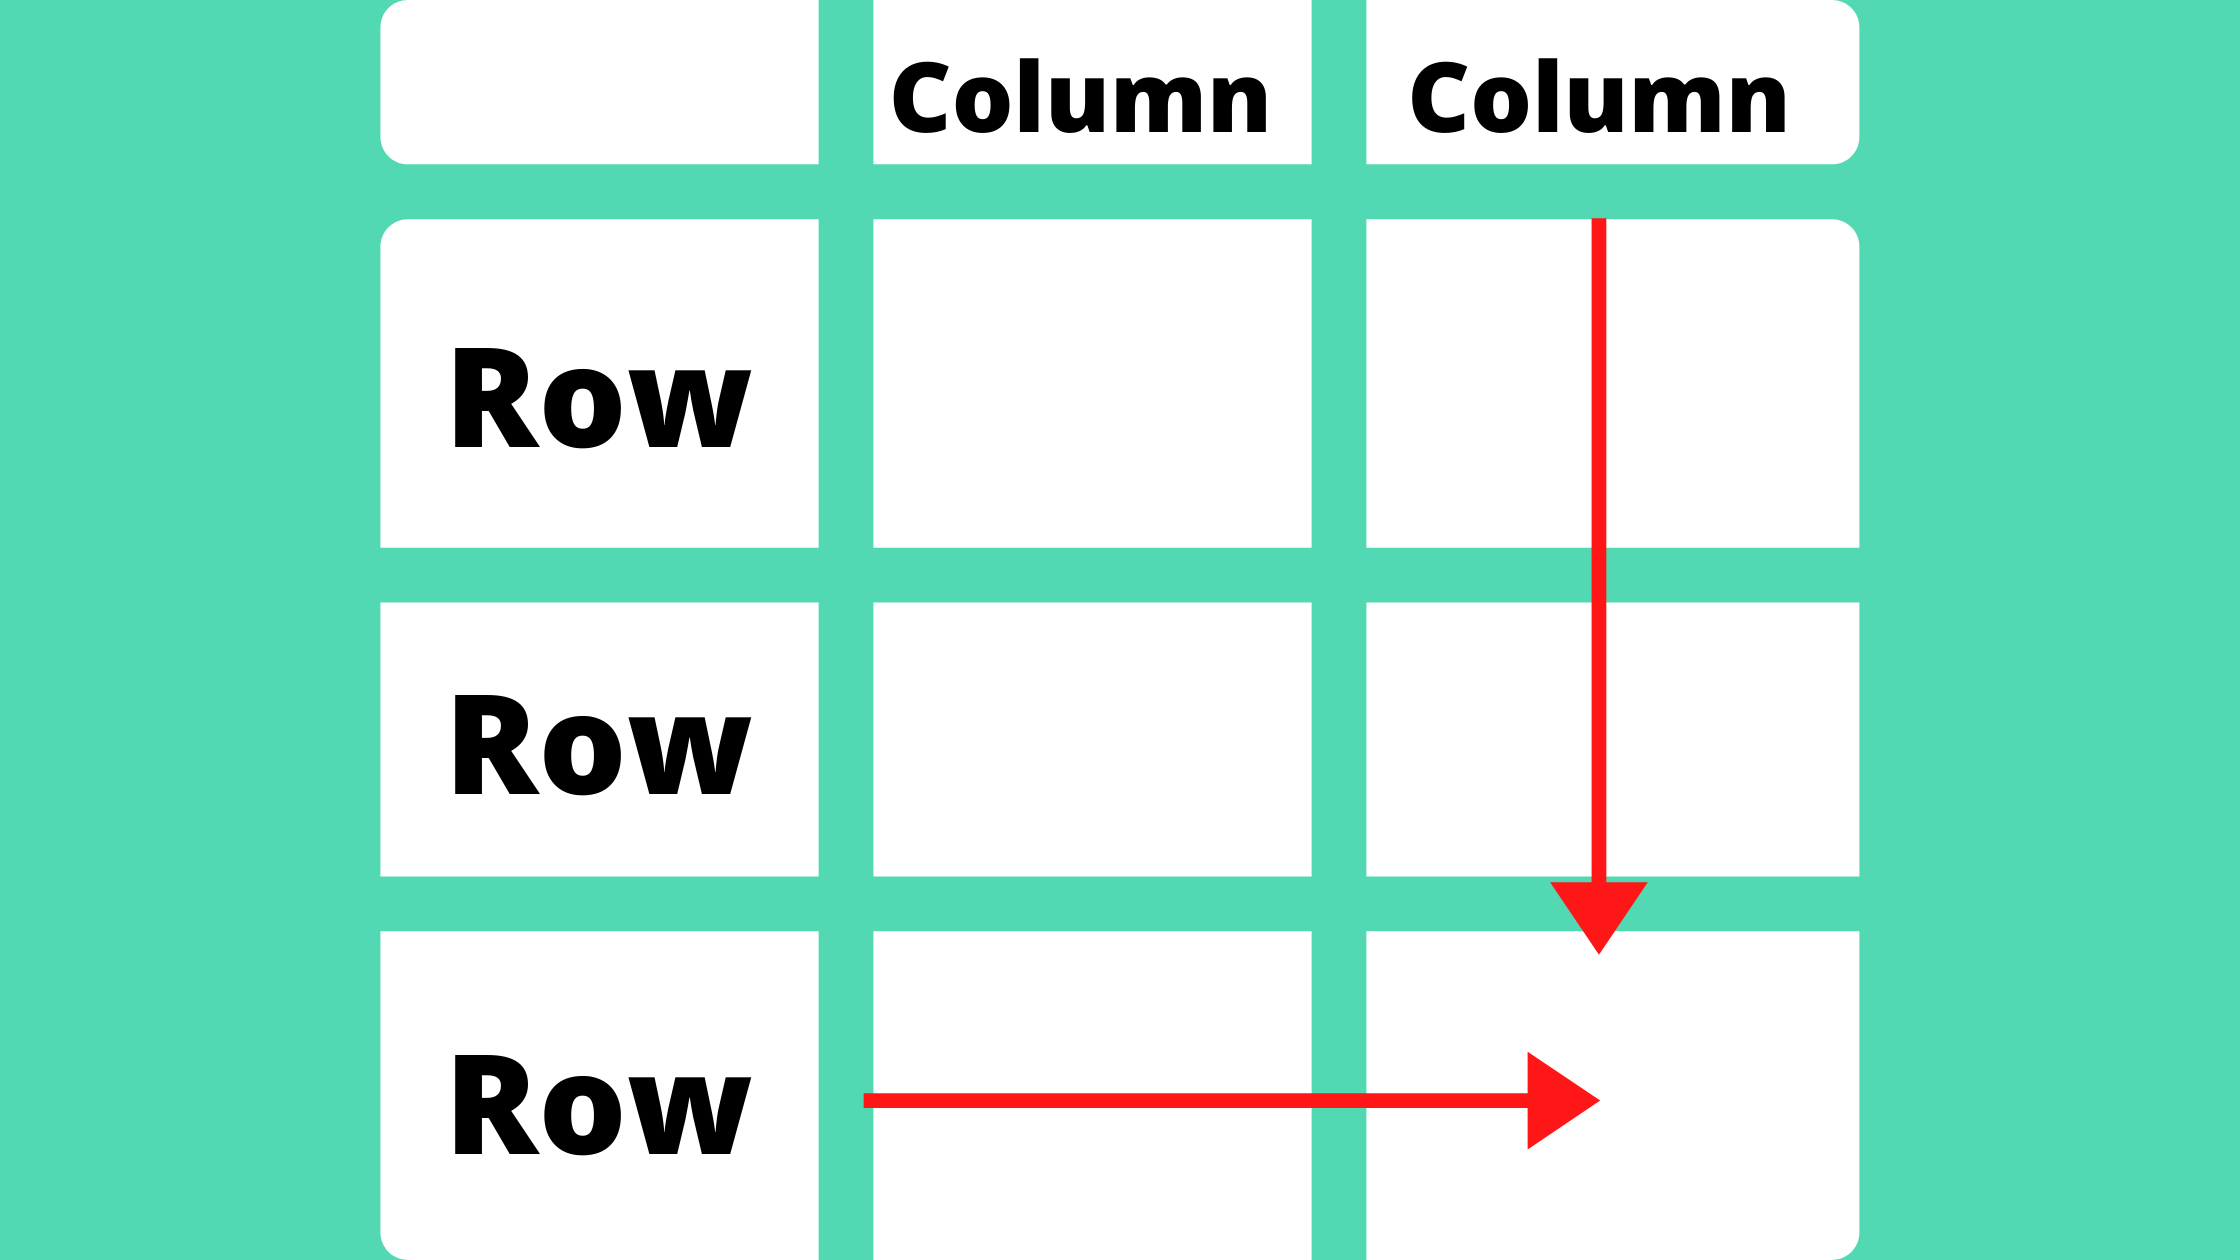

In [9]:
print(ws.cell(column=1, row=1).value) # ws["A1"].value
print(ws.cell(column=2, row=1).value) # ws["B1"].value
print(ws.cell(column=3, row=2).value) # ws["C2"].value

1
4
8


### 셀에 값을 쓰기
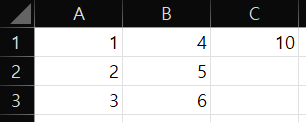

In [11]:
c = ws.cell(column=3, row=1, value=1000) # C1
wb.save("edwards.xlsx")

### 랜덤값으로 10x10에 값을 채워넣기
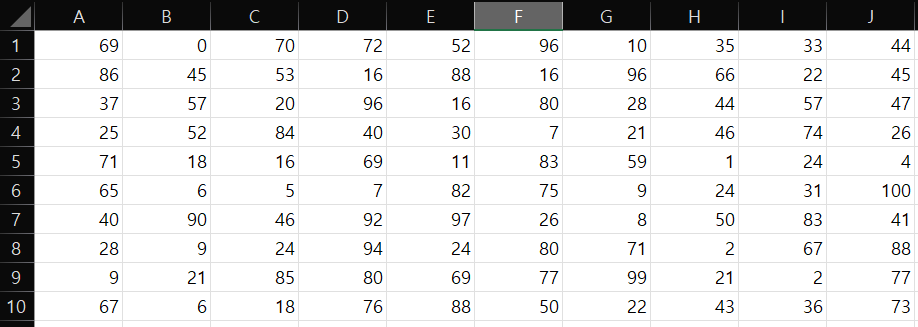
- 난수 발생을 위해서는 random 모듈을 Import

In [12]:
from random import *

index = 1
for x in range(1, 11): # 10 개 row
    for y in range(1, 11): # 10 개 column
        ws.cell(row=x, column=y, value=randint(0, 1000)) # 0~100 사이의 숫자
wb.save("edwards.xlsx")

### 10x10셀에 1~100으로 으로 채우기
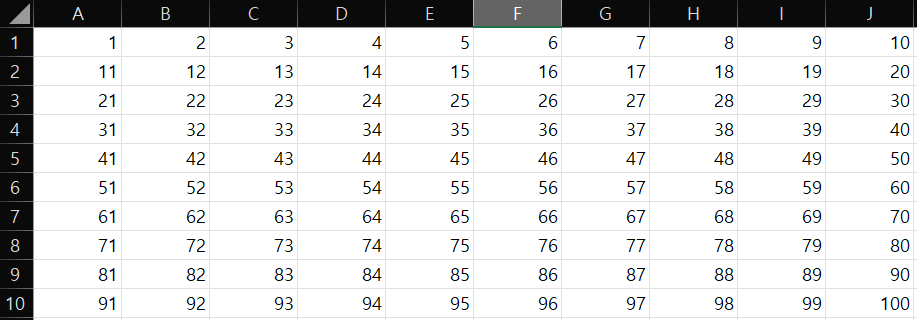

In [13]:
index = 1
for x in range(1, 11): # 10 개 row
    for y in range(1, 11): # 10 개 column
        ws.cell(row=x, column=y, value=index)
        index += 1
wb.save("edwards.xlsx")
wb.close()

### 파일 열기

- load_workbook

# 셀의 범위 지정하기

1번부터 10번까지 영어 수학 점수를 임의의 점수로 생성

- Faker 모듈 : 이름, 주소, 등등각종 정보를 임의로 생성해주는 모듈

In [15]:
from faker import Faker
fake = Faker("ko_KR")

In [16]:
wb = Workbook()
ws = wb.active

ws.append(["ID", "Name", "English", "Math", "Science", "Literature"])
for i in range(1, 100):     
    ws.append([i, fake.name(), randint(0, 100), randint(0, 100), randint(0, 100), randint(0, 100)])
wb.save("score.xlsx")
wb.close()

### File에서 불러오기

In [17]:
from openpyxl import load_workbook 

wb = load_workbook("score.xlsx") 
ws = wb.active 

# worksheet내용 출력 
for x in range(1, ws.max_row + 1):
    for y in range(1, ws.max_column + 1):
        print(ws.cell(row=x, column=y).value, end=" ") # 1 2 3 4 ..
    print()

ID Name English Math Science Literature 
1 하도윤 68 23 51 8 
2 이명숙 64 25 88 55 
3 서서준 6 52 7 15 
4 조성훈 40 39 27 67 
5 권경희 9 37 19 81 
6 민숙자 93 49 15 52 
7 권승민 19 4 50 94 
8 장정훈 51 14 40 45 
9 김경숙 39 97 88 64 
10 김영길 13 16 5 7 
11 김수민 21 21 42 6 
12 백보람 40 99 68 92 
13 이지연 0 17 75 80 
14 강병철 41 92 97 88 
15 김영식 82 36 78 42 
16 한지은 8 57 63 34 
17 이예은 22 89 60 50 
18 나영철 59 36 44 5 
19 이채원 89 41 88 30 
20 강승민 53 80 93 76 
21 서민수 12 92 66 75 
22 이승민 66 100 26 15 
23 김성진 53 51 98 22 
24 황수민 68 97 55 55 
25 김영철 0 10 2 99 
26 박민석 32 1 2 27 
27 한혜진 81 39 68 55 
28 권성수 58 23 56 25 
29 박선영 81 32 54 78 
30 이상철 1 53 67 26 
31 김옥자 47 75 95 95 
32 김수민 45 49 5 64 
33 김경숙 76 11 96 65 
34 이영환 81 51 59 21 
35 박건우 46 16 8 12 
36 정경숙 38 60 94 82 
37 박영환 20 41 18 92 
38 하미영 28 79 34 81 
39 권영숙 82 30 61 0 
40 진상호 7 67 69 34 
41 심민수 38 61 81 62 
42 이명숙 68 58 82 81 
43 장은정 8 88 34 94 
44 윤승현 34 35 54 14 
45 이선영 33 94 61 58 
46 이현숙 38 30 67 61 
47 이미숙 94 70 31 57 
48 이성현 72 53 9 74 
49 이정호 100 53 67 65 
50 김영철 6

Pandas를 이용해 더 쉽게 불러오기! 

In [18]:
import pandas as pd
df = pd.read_excel("score.xlsx", engine = "openpyxl")
df

,ID,Name,English,Math,Science,Literature
0,1,하도윤,68,23,51,8
1,2,이명숙,64,25,88,55
2,3,서서준,6,52,7,15
3,4,조성훈,40,39,27,67
4,5,권경희,9,37,19,81
...,...,...,...,...,...,...
94,95,박도윤,23,58,17,38
95,96,한미숙,21,81,51,12
96,97,박지아,46,33,26,27
97,98,강재호,4,67,15,39


- Filtering : 영어 성적 90 점이 상인 애들만 Filter

In [20]:
eng_high = df['Science'] > 90
df[eng_high]

,ID,Name,English,Math,Science,Literature
13,14,강병철,41,92,97,88
19,20,강승민,53,80,93,76
22,23,김성진,53,51,98,22
30,31,김옥자,47,75,95,95
32,33,김경숙,76,11,96,65
35,36,정경숙,38,60,94,82
64,65,문영수,8,43,91,66
66,67,문은주,13,35,97,57
67,68,심지훈,23,0,97,7
75,76,박미숙,69,11,96,71


In [21]:
df[eng_high].to_excel('high_eng_score.xlsx',sheet_name='high_eng')

# 셀 추가 삭제
1. 열 추가하기

In [22]:
from openpyxl import load_workbook
wb = load_workbook(filename="score.xlsx")
ws = wb.active
ws.insert_rows(8) # 8번째 줄이 비워짐
ws.insert_rows(8, 5) # 8번째 줄 위치에 5줄을 추가
wb.save("score_insert_rows.xlsx")

2. Column 추가하기

In [23]:
ws.insert_cols(2, 3) # B번째 열로부터 3열 추가
wb.save("score_insert_cols.xlsx")

3. 열 삭제하기

In [24]:
wb = load_workbook("score.xlsx")
ws = wb.active

# ws.delete_rows(8) # 8 번째 줄에 있는 7 번 학생 데이터 삭제
ws.delete_rows(8, 3) # 8번째 줄부터 총 3줄 삭제
wb.save("score_delete_row.xlsx")

4. Column 삭제하기

In [ ]:
wb = wb.load_workbook("score.xlsx")
ws = wb.active

# ws.delete_cols(2) # 2번째 열 (B) 삭제
ws.delete_cols(2, 2) # 2번재 열로부터 총 2개 열 삭제

wb.save("score_delete_col.xlsx")

5. 이동하기

In [25]:
wb = load_workbook("score.xlsx")
ws = wb.active

ws.move_range("B1:C11", rows=0, cols=1)
ws["B1"].value = "Chemistry" # B1 셀에 'Chemistry' 입력

wb.save("score_Chemistry.xlsx")